# **MACHINE PROBLEM 2**

**Name:** Maxyne Nuela Ignacio

**Year & Section:** BS Computer Science- IS -3B

# **Step 1: Install OpenCV**

In [ ]:
!pip install opencv-python-headless

# **Step 2: Import Libraries**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from io import BytesIO
from PIL import Image

# **Step 3: Display Image**

In [ ]:
def display_image(img,title="Image", figsize=(12,6)):
    plt.figure(figsize=figsize)
    plt.subplot(1,2,1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title, fontsize=16, fontweight='bold')
    plt.axis("off")
    plt.show()

def display_image_gray(img1,img2, title1="Image 1",  title2="Image 2", figsize=(12,6)):
    plt.figure(figsize=figsize)
    plt.subplot(1,2,1)
    plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    plt.title(title1, fontsize=16, fontweight='bold')
    plt.axis("off")


    plt.subplot(1,2,2)
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    plt.title(title2, fontsize=16, fontweight='bold')
    plt.axis("off")

    plt.show()

# **Step 4: Load Image**

Saving IgnacioMN_BSCS1B - Auditor.jpg to IgnacioMN_BSCS1B - Auditor.jpg


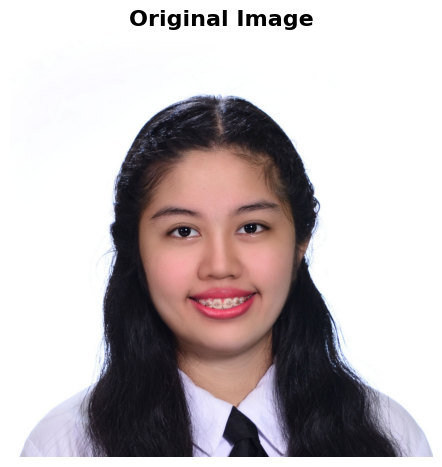

In [ ]:
upload = files.upload()

image_path = next(iter(upload))
image = Image.open(BytesIO(upload[image_path]))
image = cv2.cvtColor(np.array(image),cv2.COLOR_RGB2BGR)

display_image(image, "Original Image")

# **Step 5: Scaling and Rotation**

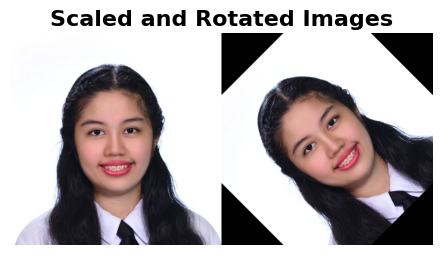

In [ ]:
# Function to scale the image
def scale_image(img, scale_factor):
    height, width = img.shape[:2]
    scale_img = cv2.resize(img, (int(width * scale_factor), int(height * scale_factor)), interpolation=cv2.INTER_LINEAR)
    return scale_img

# Function to rotate the image
def rotate_image(img, angle):
    height, width = img.shape[:2]
    center = (width / 2, height / 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_img = cv2.warpAffine(img, matrix, (width, height))
    return rotated_img

# Apply scaling and rotation
scaled_image = scale_image(image, 0.5)
rotated_image = rotate_image(image, 45)

# Resize images to have the same height
scaled_image_resized = cv2.resize(scaled_image, (rotated_image.shape[1], rotated_image.shape[0]))

# Combine the images side by side
side_by_side_image = cv2.hconcat([scaled_image_resized, rotated_image])

# Display the combined image
display_image(side_by_side_image, "Scaled and Rotated Images")

# **Step 6: Apply Filtering Techniques**

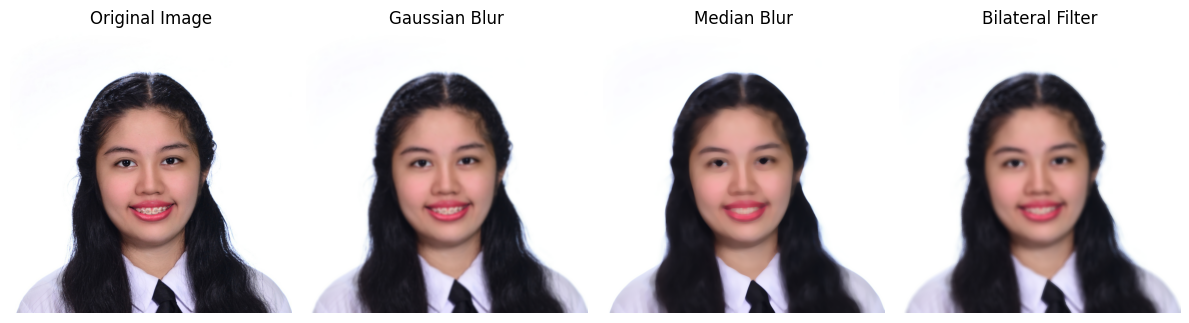

In [ ]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB for matplotlib

# Split the image into R, G, B channels to apply blur separately
r, g, b = cv2.split(image_rgb)

# Apply stronger blurring techniques on each channel separately
gaussian_blur_r = cv2.GaussianBlur(r, (35, 35), 0)
gaussian_blur_g = cv2.GaussianBlur(g, (35, 35), 0)
gaussian_blur_b = cv2.GaussianBlur(b, (35, 35), 0)
gaussian_blur = cv2.merge([gaussian_blur_r, gaussian_blur_g, gaussian_blur_b])

median_blur_r = cv2.medianBlur(r, 35)
median_blur_g = cv2.medianBlur(g, 35)
median_blur_b = cv2.medianBlur(b, 35)
median_blur = cv2.merge([median_blur_r, median_blur_g, median_blur_b])

bilateral_filter_r = cv2.bilateralFilter(r, 35, 150, 150)
bilateral_filter_g = cv2.bilateralFilter(g, 35, 150, 150)
bilateral_filter_b = cv2.bilateralFilter(b, 35, 150, 150)
bilateral_filter = cv2.merge([bilateral_filter_r, bilateral_filter_g, bilateral_filter_b])

# Prepare list of images and their labels
images = [image_rgb, gaussian_blur, median_blur, bilateral_filter]
labels = ['Original Image', 'Gaussian Blur', 'Median Blur', 'Bilateral Filter']

# Set up matplotlib figure
plt.figure(figsize=(12, 6))
for i in range(len(images)):
    plt.subplot(1, len(images), i + 1)
    plt.imshow(images[i])
    plt.title(labels[i])
    plt.axis('off')

# Show the combined image with labels
plt.tight_layout()
plt.show()

# **Step 6: Edge Detection**


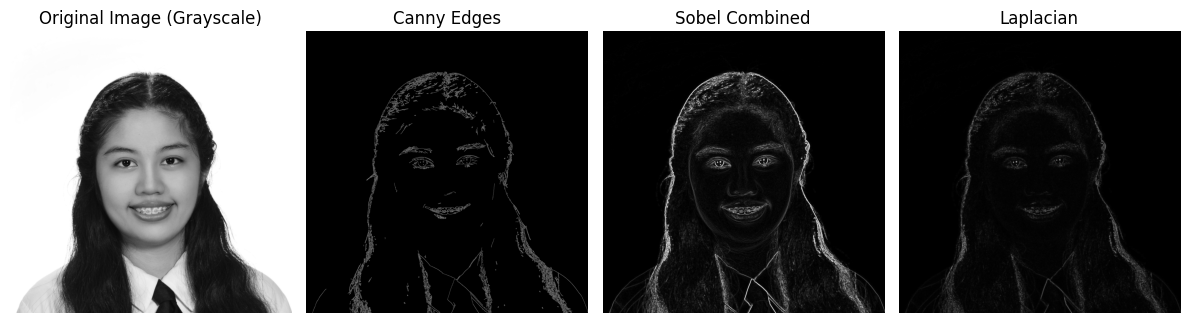

In [ ]:
if image is None:
    print("Error loading image")
else:
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

    # Adjusted edge detection parameters
    # Apply edge detection techniques with fine-tuned parameters
    canny_edges = cv2.Canny(grayscale_image, 50, 150)  # Lower thresholds for Canny

    # Sobel Edge Detection in both X and Y directions
    sobel_x = cv2.Sobel(grayscale_image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(grayscale_image, cv2.CV_64F, 0, 1, ksize=3)

    # Combining Sobel X and Y into a single output for better edge representation
    sobel_combined = cv2.magnitude(sobel_x, sobel_y)
    sobel_combined = cv2.convertScaleAbs(sobel_combined)  # Convert to 8-bit for display

    # Laplacian Edge Detection
    laplacian = cv2.Laplacian(grayscale_image, cv2.CV_64F, ksize=3)
    laplacian = cv2.convertScaleAbs(laplacian)  # Convert to 8-bit for display

    # Prepare list of images and their labels
    images = [grayscale_image, canny_edges, sobel_combined, laplacian]
    labels = ['Original Image (Grayscale)', 'Canny Edges', 'Sobel Combined', 'Laplacian']

    # Set up matplotlib figure
    plt.figure(figsize=(12, 6))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(labels[i])
        plt.axis('off')

    # Show the combined image with labels
    plt.tight_layout()
    plt.show()